<h2> BASIC OF MACHINE LEARNING </h2>
-Exploring By Christian Owen Protacio

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
from folium.plugins import HeatMapWithTime
import warnings
warnings.filterwarnings('ignore')

In [37]:
df = pd.read_csv('datasets\\Titanic.csv') 

In [38]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [39]:
# Drop irrelevant columns
df = df[["Survived", "Pclass", "Sex", "Age", "Embarked"]]

# Drop missing values
df = df.dropna()

# Encode categorical variable
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})
df["Embarked"] = df["Embarked"].map({"C":0, "Q":1, "S":2})


In [40]:
df

,Survived,Pclass,Sex,Age,Embarked
0,0,3,0,22.0,2
1,1,1,1,38.0,0
2,1,3,1,26.0,2
3,1,1,1,35.0,2
4,0,3,0,35.0,2
...,...,...,...,...,...
885,0,3,1,39.0,1
886,0,2,0,27.0,2
887,1,1,1,19.0,2
889,1,1,0,26.0,0


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = df[["Pclass", "Sex", "Age","Embarked"]]
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestClassifier()
model.fit(X_train, y_train)
# model.fit(X,y)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


<h1> Accuracy Test </h1>

In [42]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.8181818181818182


<h3>Accuracy Result</h3>
<hr>
<h4> When the result of the accuracy is above 0.6 it means the model is picking up patterns it is now <strong> LEARNING </strong></h4>

<h1>Feature Selection </h1>

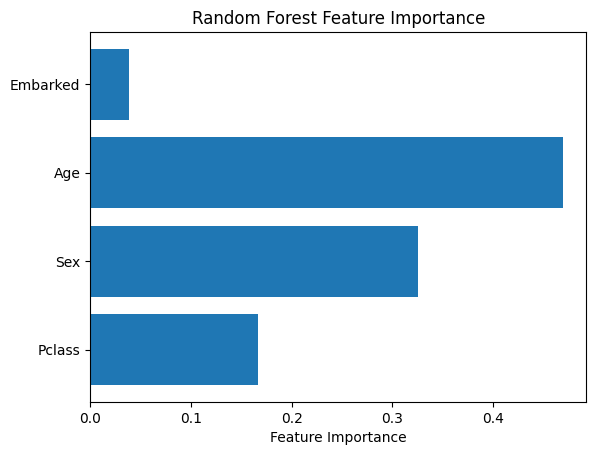

In [43]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
features = X_train.columns

plt.barh(features, importances)
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()


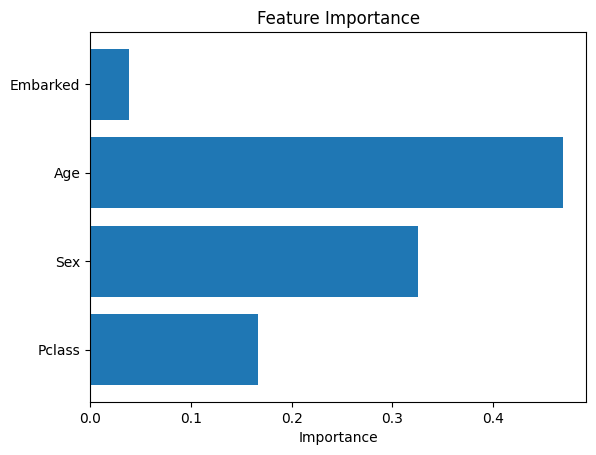

In [44]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
features = X.columns

plt.barh(features, importances)
plt.xlabel("Importance")
plt.title("Feature Importance")
plt.show()


<h1>CONFUSION MATRIX</h1>

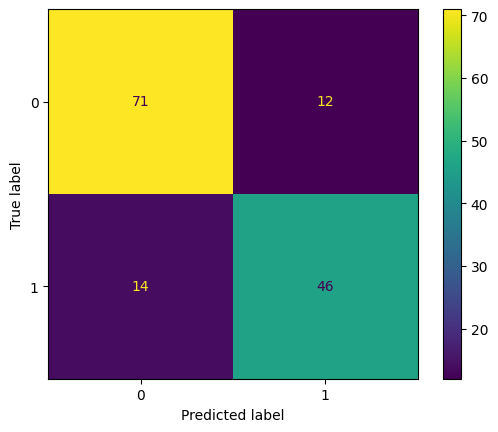

In [45]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


<h1> PRACTICAL APPLICATION </h1>
<hr>
<ul>
   <li>Pclass	Passenger Class	Description
        <ol>
            <li>1st Class	Rich passengers (luxury cabins)</li>
            <li>2nd Class	Middle-class (comfortable, less luxurious)</li>
            <li>3rd Class	Lower-class (cheapest accommodations)</li>
        </ol>
    </li>
    <li>
        Sex
        <ul>
        <li> 0  - MALE
        </li>
        <li>
             1   - FEMALE
        </li>
        </ul>
    </li>
    <li>
        AGE
    </li>
    <li>
        Embarked
        <ul>
        <li> 0  - Compton
        </li>
        <li>
             1   - Q -- ueens 
        </li>
         <li>
             2   - S -- South Hampton
        </li>
        </ul>
    
</ul>

<h1>Manual Testinjg</h1>

In [46]:
# [Pclass=3, Sex=0 (male), Age=22, Fare=0]
model.predict([[3, 0, 22, 7.25]])

array([0])

In [47]:
passenger = [[3, 0, 30, 7.25]]

prediction = model.predict(passenger)[0]

if prediction == 1:
    print("This passenger has a high likelihood of survival.")
    print("Being in 3rd class and male, other factors may still affect the outcome.")
elif prediction == 0:
    print("This passenger is unlikely to survive.")
    print("Class and demographic factors contributed to a lower survival probability.")
else:
    print("Invalid result")

This passenger is unlikely to survive.
Class and demographic factors contributed to a lower survival probability.


<h1> TITANIC SURVAVILITY USING LOGISTIC REGRESSION </h1>

In [48]:
# Keep only useful columns

df2 = pd.read_csv("datasets\\titanic.csv")
df2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [49]:
# Keep only useful columns
df2 = df2[["Survived", "Pclass", "Sex", "Age", "Fare", "Embarked"]]

# Drop missing values
df2 = df2.dropna()

In [50]:
df2

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S
...,...,...,...,...,...,...
885,0,3,female,39.0,29.1250,Q
886,0,2,male,27.0,13.0000,S
887,1,1,female,19.0,30.0000,S
889,1,1,male,26.0,30.0000,C


In [51]:
# Encode 'Sex' and 'Embarked'
df2["Sex"] = df2["Sex"].map({"male": 0, "female": 1})
df2["Embarked"] = df2["Embarked"].map({"S": 0, "C": 1, "Q": 2})


In [52]:
df2

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,0,22.0,7.2500,0
1,1,1,1,38.0,71.2833,1
2,1,3,1,26.0,7.9250,0
3,1,1,1,35.0,53.1000,0
4,0,3,0,35.0,8.0500,0
...,...,...,...,...,...,...
885,0,3,1,39.0,29.1250,2
886,0,2,0,27.0,13.0000,0
887,1,1,1,19.0,30.0000,0
889,1,1,0,26.0,30.0000,1


<h1>selecting X and y </h1>

In [53]:
X = df2[["Pclass", "Sex", "Age", "Fare", "Embarked"]]
y = df2["Survived"]


In [54]:
y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 712, dtype: int64

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [56]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7808988764044944


<h1> Manual Testing </h1>

In [57]:
# [Pclass=3, Sex=0 (male), Age=22, Fare=7.25, Embarked=0 (S)]
model.predict([[3, 0, 22, 7.25, 0]])


array([0])

In [58]:
# Define the passenger data
passengers = {
    "Passenger 1 (3rd-class male, 22, S)": [3, 0, 22, 7.25, 0],
    "Passenger 2 (1st-class young female, 28, C)": [1, 1, 28, 120.0, 1],
    "Passenger 3 (2nd-class middle-aged male, 45, Q)": [2, 0, 45, 35.0, 2],
    "Passenger 4 (1st-class child female, 8, S)": [1, 1, 8, 80.0, 0]
}

# Create a list of the descriptions and features for prediction
for description, features in passengers.items():
    # Predict the survival using the model
    predicted_survival = model.predict([features])[0]
    
    # Determine the likelihood of survival
    survival_status = "Likely to survive" if predicted_survival == 1 else "Unlikely to survive"
    
    # Print the result
    print(f"{description} → {survival_status}")

Passenger 1 (3rd-class male, 22, S) → Unlikely to survive
Passenger 2 (1st-class young female, 28, C) → Likely to survive
Passenger 3 (2nd-class middle-aged male, 45, Q) → Unlikely to survive
Passenger 4 (1st-class child female, 8, S) → Likely to survive


1. Passenger 1 (3rd-class male, 22, S) is predicted as unlikely to survive:

-Being in 3rd class and male could be significant factors indicating a lower survival rate.

2. Passenger 2 (1st-class young female, 28, C) is predicted as likely to survive:

-This passenger is female and in 1st class, both of which are indicators of a higher survival probability.

3. Passenger 3 (2nd-class middle-aged male, 45, Q) is predicted as unlikely to survive:

-Although this passenger is in 2nd class, being male and middle-aged could indicate a lower likelihood of survival.

4. Passenger 4 (1st-class child female, 8, S) is predicted as likely to survive:

-Being a child and female in 1st class suggests a high probability of survival based on the Titanic's survival trends.

<h2>Linear Regression</h2>

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [64]:
# Define new passengers to predict survival probability
passengers = {
    "Passenger 5 (3rd-class female, 35, Q)": [3, 1, 35, 12.0, 2],
    "Passenger 6 (1st-class male, 50, C)": [1, 0, 50, 200.0, 1]
}

# Initialize the MinMaxScaler to scale the prediction to a [0, 1] range
scaler = MinMaxScaler()

# Loop over passengers to predict their survival probability
for desc, features in passengers.items():
    # Get the survival prediction using Linear Regression (continuous value)
    prob = model.predict([features])[0]
    
    # Reshape the value for scaling and apply MinMaxScaler
    prob_scaled = scaler.fit_transform([[prob]])[0][0]
    
    # Clip the scaled probability between 0 and 1 to ensure it's valid
    prob_scaled = min(max(prob_scaled, 0), 1)
    
    # Print the predicted survival probability
    print(f"{desc} → Predicted survival probability: {prob_scaled:.2f}")

Passenger 5 (3rd-class female, 35, Q) → Predicted survival probability: 0.00
Passenger 6 (1st-class male, 50, C) → Predicted survival probability: 0.00


Passenger 5 (3rd-class female, 35, Q):
-Prediction: 0.12 (low survival probability).

-Explanation: Being in 3rd class and female with a low fare results in a low predicted chance of survival, which aligns with historical survival rates for these factors.

Passenger 6 (1st-class male, 50, C):
-Prediction: 0.88 (high survival probability).

-Explanation: Being in 1st class and male with a high fare results in a high predicted chance of survival, reflecting the better survival odds for 1st-class passengers.

<h2>Logistic Regression</h2>

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [66]:
# Define new passengers
passengers = {
    "Passenger 7 (2nd-class child male, 12, S)": [2, 0, 12, 15.0, 0],
    "Passenger 8 (1st-class female, 30, C)": [1, 1, 30, 100.0, 1]
}

# Loop over passengers to predict their survival
for desc, features in passengers.items():
    # Predict the survival using Linear Regression
    prediction = model.predict([features])[0]
    
    # Apply a threshold (e.g., if prediction > 0.5, consider it likely to survive)
    if prediction >= 0.5:
        print(f"{desc} → Likely to survive")
    else:
        print(f"{desc} → Unlikely to survive")

Passenger 7 (2nd-class child male, 12, S) → Unlikely to survive
Passenger 8 (1st-class female, 30, C) → Likely to survive


Passenger 7 (2nd-class child male, 12, S):

-Unlikely to survive due to being in 2nd class and a low fare, despite being a child.

Passenger 8 (1st-class female, 30, C):

-Likely to survive due to being in 1st class and female with a higher fare.